In [1]:
import pickle 
with open('../../outputs/figure-2/cifar10-med-net-std-xent_inf_out_unlbld.pkl',"rb") as f :
    inf_out_std_xent = pickle.load(f)


with open('../../outputs/figure-2/cifar10-med-net-std-xent_FalCon_inf_out_unlbld.pkl',"rb") as f :
    inf_out_std_xent_falcon = pickle.load(f)

with open('../../outputs/figure-2/cifar10-med-net-std-xent_Scaling_inf_out_unlbld.pkl',"rb") as f :
    inf_out_std_xent_scaling = pickle.load(f)


In [2]:
import torch 
import numpy as np
import seaborn as sns 

def safe_to_numpy(x):
    if(torch.is_tensor(x)):
        return x.numpy()
    else:
        return x 

In [3]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib as mpl
import matplotlib.pyplot as plt 

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

def visualize_scores_dist(ax, inf_out, clf=None, calibrator=None, ds=None, plot_type={}, normalize=False,loc="upper left"):
    
    if(inf_out==None):
        if(calibrator):
            inf_out = calibrator.predict(ds,inference_conf=None)
        else:
            inf_out = clf.predict(ds,inference_conf=None)
    
    
    y_hat = safe_to_numpy(inf_out['labels'])
    Y     = safe_to_numpy(inf_out['true_labels'])
    idx = np.arange(0,len(Y),1) 

    correct_idcs   = idx[y_hat==Y]
    incorrect_idcs = idx[y_hat!=Y]

    scores = safe_to_numpy(inf_out['confidence'])
    #sns.histplot(np.clip(scores[correct_idcs],0,1),ax=ax_scores_dist)
    #sns.histplot(np.clip(scores[incorrect_idcs],0,1),ax=ax_scores_dist)
    p =plot_type
    if(normalize):
        scores = scores - min(scores)
        scores = scores/max(scores)
    
    if(plot_type['name']=='hist'):
        
        
        h1, edges1 = np.histogram(scores[correct_idcs],bins=p['num_bins'],density=True, )
        h1 = h1/np.sum(h1)
        h2, edges2 = np.histogram(scores[incorrect_idcs],bins=p['num_bins'],density=True, )
        h2 = h2/np.sum(h2)
        ax.bar(edges1[1:], height=h1, width=0.01,color='blue',label='Correct') #histtype=p['histtype']
        ax.bar(edges2[1:], height=h2, width=0.01,color='red',label='Incorrect')
        ax.set_xlim(-0.1,1.1)
        ax.set_ylim(0,max(max(h1),max(h2)))
        

    elif(plot_type['name']=='kde'):
        #sns.color_palette("hls", 8)
        sns.kdeplot(np.clip(scores[correct_idcs],0,1),ax=ax, clip=(0,1.05), fill=p['fill'],label='Correct',linewidth=2.0,alpha=0.3)
        sns.kdeplot(np.clip(scores[incorrect_idcs],0,1),ax=ax, clip=(0,1.05), fill=p['fill'],label='Incorrect',linewidth=2.0,alpha=0.3)
    ax.legend(loc=loc)

    ax.set_xlabel('Scores')



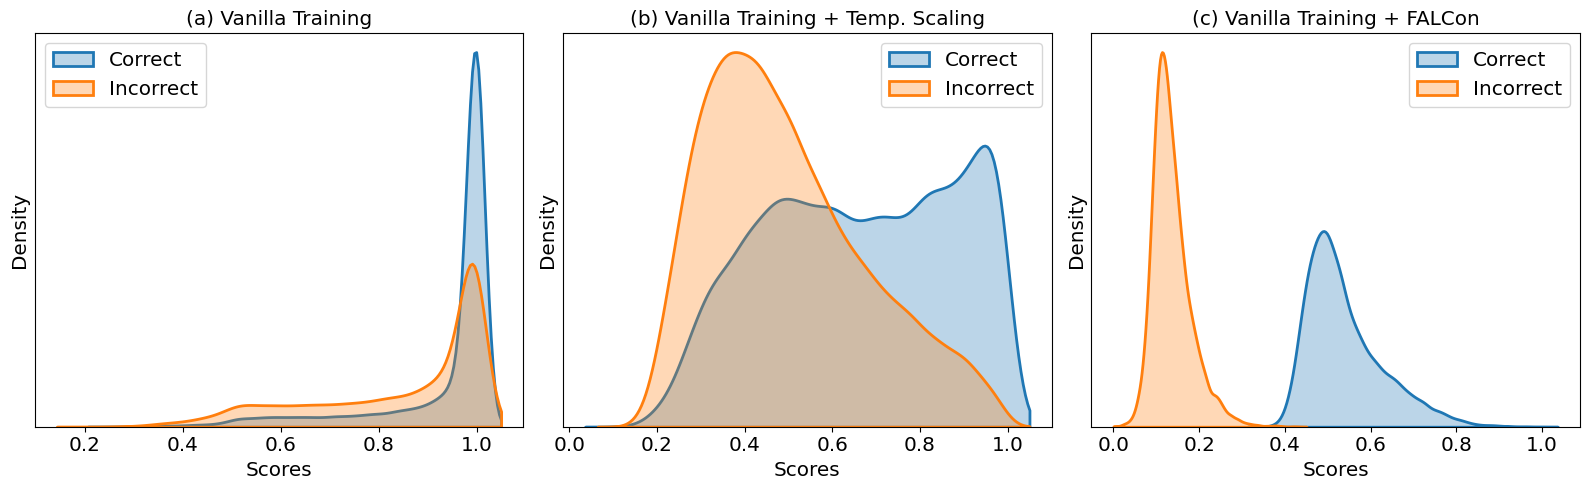

In [4]:


fig, axs = plt.subplots(1, 3,figsize=(16, 5))

#visualize_scores_dist(axs[1], inf_out, plot_type={"name":"hist", "num_bins":15})
visualize_scores_dist(axs[0], inf_out_std_xent, plot_type={"name":"kde","fill":True},loc="upper left")
axs[0].set_yticks([])
axs[0].set_title('(a) Vanilla Training')
visualize_scores_dist(axs[1], inf_out_std_xent_scaling, plot_type={"name":"kde","fill":True}, loc="upper right")
axs[1].set_yticks([])
axs[1].set_title('(b) Vanilla Training + Temp. Scaling')
visualize_scores_dist(axs[2], inf_out_std_xent_falcon, plot_type={"name":"kde","fill":True},normalize=True ,loc="upper right")
axs[2].set_yticks([])
axs[2].set_title('(c) Vanilla Training + FALCon')



plt.tight_layout()

plt.savefig(f'../../plots/scores_densities_cifar-10-med-net.pdf',dpi=100,bbox_inches='tight' )

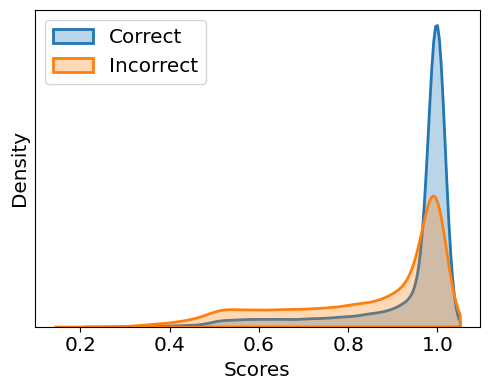

In [9]:


fig, ax = plt.subplots(1, 1,figsize=(5, 4))
visualize_scores_dist(ax, inf_out_std_xent, plot_type={"name":"kde","fill":True},loc="upper left")
ax.set_yticks([])
plt.tight_layout()
plt.savefig(f'../../plots/scores_densities_cifar-10-med-net_vanilla.pdf',dpi=70,bbox_inches='tight' )



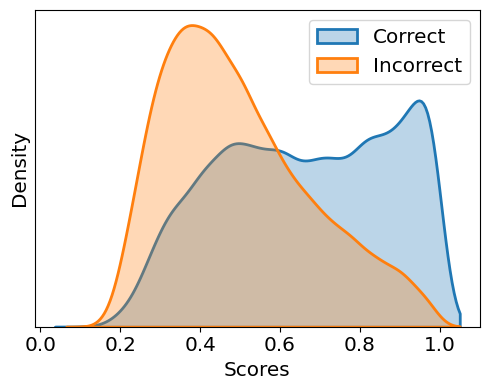

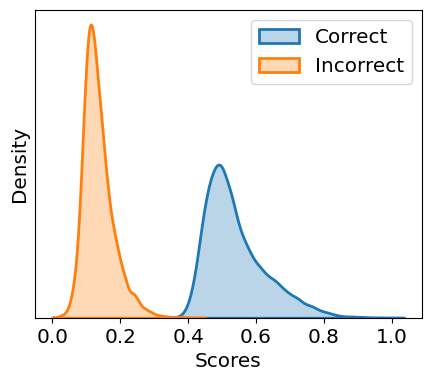

In [10]:

fig, ax = plt.subplots(1, 1,figsize=(5, 4))

visualize_scores_dist(ax, inf_out_std_xent_scaling, plot_type={"name":"kde","fill":True}, loc="upper right")
ax.set_yticks([])
plt.tight_layout()
plt.savefig(f'../../plots/scores_densities_cifar-10-med-net_vanilla_temp_scaling.pdf',dpi=70,bbox_inches='tight' )

fig, ax = plt.subplots(1, 1,figsize=(5, 4))
visualize_scores_dist(ax, inf_out_std_xent_falcon, plot_type={"name":"kde","fill":True},normalize=True ,loc="upper right")
ax.set_yticks([])
plt.savefig(f'../../plots/scores_densities_cifar-10-med-net_vanilla_falcon.pdf',dpi=70,bbox_inches='tight' )
